<a href="https://colab.research.google.com/github/lhfranca/ImersaoDados/blob/main/Aula01_ImersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np

In [92]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/ddff4f29df0d6470dd59910553899e549d0b5806/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [93]:
#Filtrando a tabela por Sorocaba
sorocaba = dados.query('NO_MUNICIPIO_RESIDENCIA =="Sorocaba"')
sorocaba.shape

(319, 136)

In [94]:
#Visualizar apenas as colunas desejadas
sorocaba[["NO_MUNICIPIO_RESIDENCIA", "SG_UF_RESIDENCIA", "TP_SEXO", "NU_NOTA_REDACAO" ]]

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_REDACAO
14268,Sorocaba,SP,M,340.0
14323,Sorocaba,SP,F,NaN
14420,Sorocaba,SP,M,620.0
14855,Sorocaba,SP,F,500.0
14881,Sorocaba,SP,F,NaN
...,...,...,...,...
125222,Sorocaba,SP,F,340.0
125226,Sorocaba,SP,M,600.0
125237,Sorocaba,SP,F,320.0
126772,Sorocaba,SP,M,360.0


In [95]:
#Obtendo a quantidade de uma variavel.
sorocaba['NU_IDADE'].value_counts()

17    103
18     51
19     26
16     20
20     17
23     15
22     13
25     10
21      9
27      8
28      5
24      5
26      4
30      4
46      3
32      3
31      3
15      2
36      2
37      2
39      2
42      2
48      2
29      1
52      1
33      1
38      1
45      1
47      1
51      1
61      1
Name: NU_IDADE, dtype: int64

In [96]:
#Obtendo a quantidade de idades e classificando da menor idade para a maior.
sorocaba['NU_IDADE'].value_counts().sort_index()

15      2
16     20
17    103
18     51
19     26
20     17
21      9
22     13
23     15
24      5
25     10
26      4
27      8
28      5
29      1
30      4
31      3
32      3
33      1
36      2
37      2
38      1
39      2
42      2
45      1
46      3
47      1
48      2
51      1
52      1
61      1
Name: NU_IDADE, dtype: int64

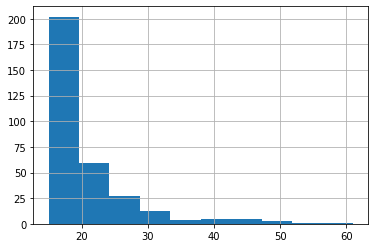

In [97]:
#Plotando um histograma para a melhor visualização.
sorocaba['NU_IDADE'].hist()

#Note que com esse gráfico, dá a falsa impressão de que o range de (13 a 20) aparece com a mesma frequência.

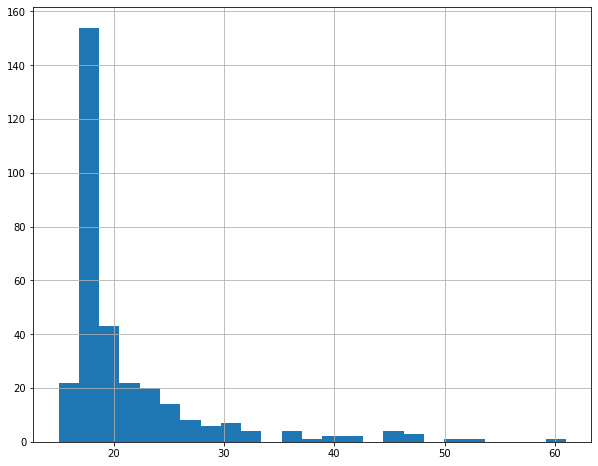

In [98]:
#Usando o método "bins", é  possível divir ainda mais o histograma, obtendo assim uma visualização mais fiel dos nossos dados.
#Figsize altera o tamanho da figura
sorocaba['NU_IDADE'].hist(bins=25, figsize = (10,8) )

In [99]:
#Analise dos treineiros
  #Query para filtrar e value_counts para contar quantos são treineiros por idade
sorocaba.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

15     2
16    20
17     4
Name: NU_IDADE, dtype: int64

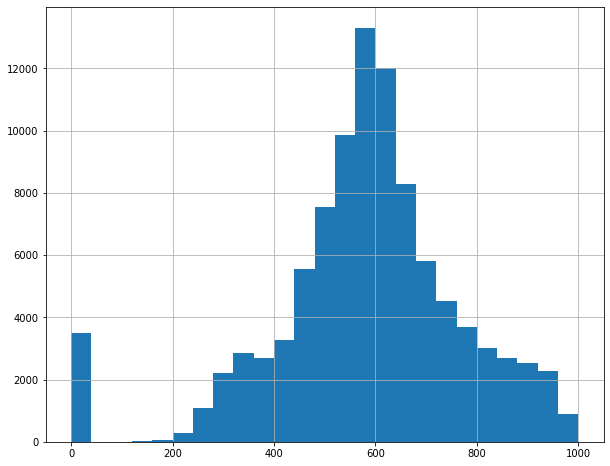

In [100]:
#Notas de redação a nível Brasil
dados['NU_NOTA_REDACAO'].hist(bins=25, figsize = (10,8))

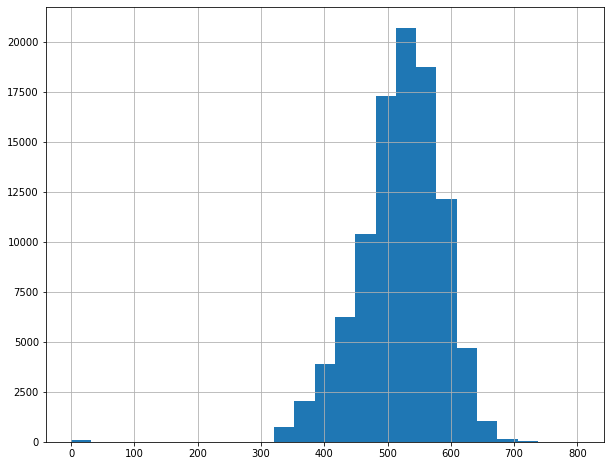

In [101]:
#Notas de Linguagens e Códigos
dados['NU_NOTA_LC'].hist(bins=25, figsize = (10,8))

In [102]:
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [103]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

#Através do método describe, conseguimos obter dados estatisticos sobre as variaveis.
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [104]:
#Análise de qual a nota de uma porcentagem da minha amostra. Atente-se que ele retorna o restante, ou seja, se eu colocar 0.9 ele retornará a nota dos 10%.
dados['NU_NOTA_LC'].quantile(0.9999)

723.9978999999934

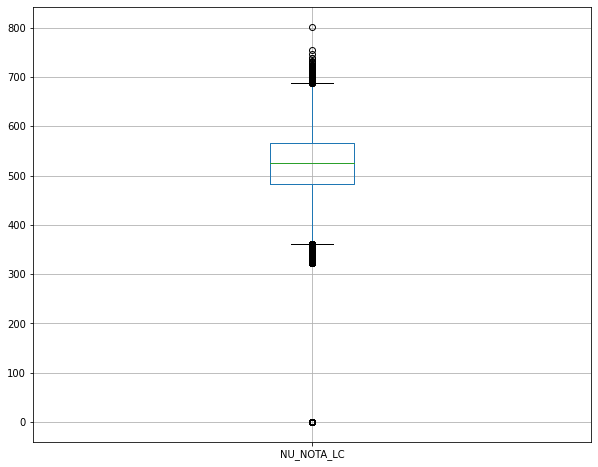

In [105]:
#Para que serve? Boxplot nos ajuda a ter uma visualização dos nossos dados estatisticos de uma maneira mais fácil e rápida. Porém com menos detalhe.

dados['NU_NOTA_LC'].plot.box(grid = True, figsize = (10,8))

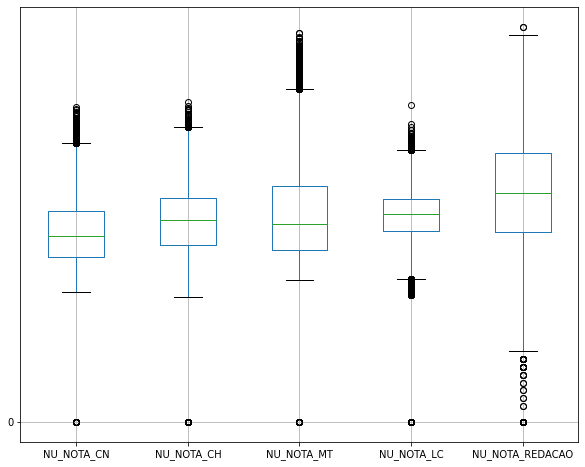

In [110]:
dados[provas].plot.box(grid = True, figsize = (10,8))